In [22]:
import torch
import pandas as pd
import plotnine as pn

import sys
sys.path.append("/Users/nathanielimel/uci/projects/ibsg/src")
from misc.tools import random_stochastic_matrix
from misc.vis import numeric_col_to_categorical

In [23]:
encoder = random_stochastic_matrix((100, 10), 1e5)

In [24]:
# Reshape data into tidydata
num_meanings, num_words = encoder.shape
meanings = torch.tensor([[i] * num_words for i in range(num_meanings)]).flatten()
words = torch.tensor(list(range(num_words)) * num_meanings)

data = torch.stack([meanings, words, encoder.flatten()]).T

data = pd.DataFrame(data, columns=["meanings", "words", "p(w|m)"])
data

,meanings,words,p(w|m)
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,2.0,0.0
3,0.0,3.0,0.0
4,0.0,4.0,0.0
...,...,...,...
995,99.0,5.0,0.0
996,99.0,6.0,0.0
997,99.0,7.0,0.0
998,99.0,8.0,0.0


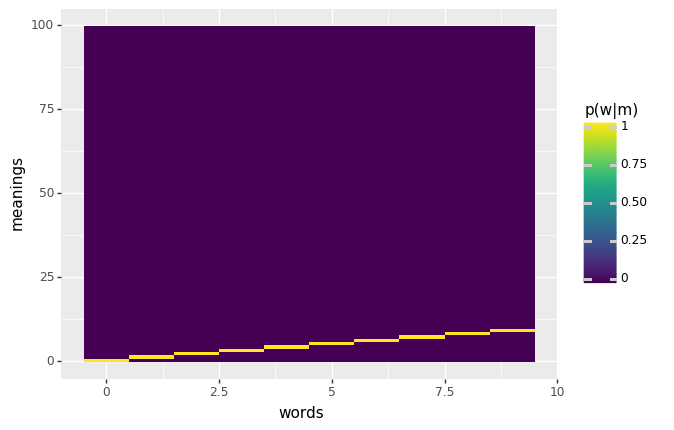

In [25]:
plot = (
    pn.ggplot(data, pn.aes(x="words", y="meanings", fill="p(w|m)"))
    + pn.geom_tile()
)
print(plot)

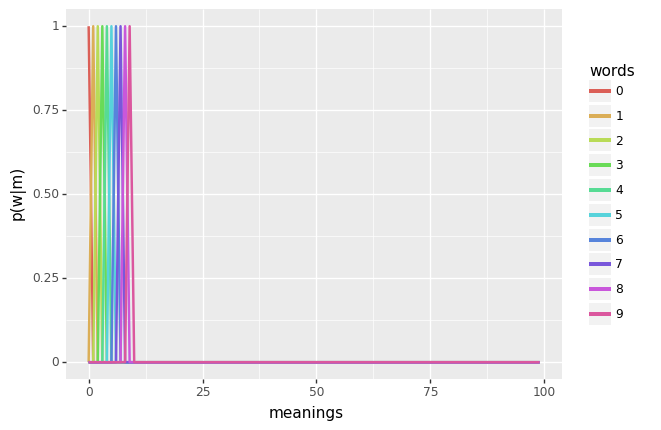

In [26]:
# Now try creating frequency dists

data = numeric_col_to_categorical(data, "words")
# data = numeric_col_to_categorical(data, "meanings")

plot = (
    pn.ggplot(data, pn.aes(x="meanings", y="p(w|m)"))
    + pn.geom_line(
     mapping=pn.aes(
        color="words",
        ),

     size=1,
    )
)
print(plot)